In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import *

In [2]:
folder = "data/sepdist_4-20parts/"

In [28]:
num_seps = 1000000
num_partials = 10000
seps = np.empty(num_seps)
for i in range(100):
    sepsi = np.load(folder+str(i+1)+"/seps_1.npy")
    seps[i*num_partials:(i+1)*num_partials] = sepsi
np.save(folder+"separations.npy", seps)

In [5]:
print(seps)

[0.01565965 0.09442584 0.05389842 ... 0.00351528 0.01909424 0.0168066 ]


In [3]:
seps = np.load("data/gt_4-20parts_uniformsep/distr/separations.npy")

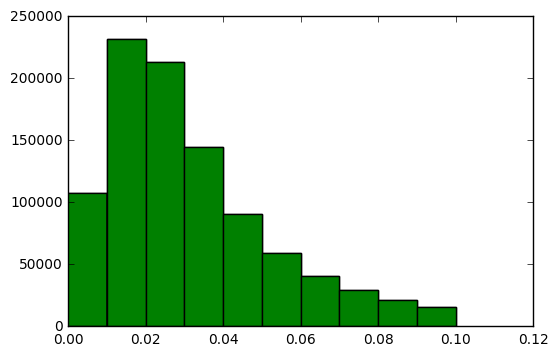

In [5]:
plt.hist(seps, range=(0,0.1))
#plt.hist(seps)
plt.show()

In [25]:
num_bins = 500
hist, bins = np.histogram(seps, num_bins, range=(0, 0.1), density=True)
min_density = np.min(hist)

In [27]:
# rejection sampling
num_gts = 400
min_num_srcs = 4
max_num_srcs = 20
wmin = 0.9
wmax = 1.1
for it in range(num_gts):
    while True:
        num_sources = np.random.randint(min_num_srcs, max_num_srcs+1)
        support = np.empty((num_sources, 4))
        for i in range(num_sources):
            while True:
                pos = np.random.rand(2)
                vel = np.random.rand(2)-0.5
                before = pos-vel
                after = pos+vel
                if np.all((0 < before) & (0 < after) & (before < 1) & (after < 1)):
                    support[i] = np.hstack((pos, vel))
                    break

        sep = min_dyn_sep(support, 1, 1)
        idx = np.digitize(sep, bins)-1
        if idx < len(hist):
            density = hist[idx]
            reject = np.random.rand()
            if reject < min_density/density:
                weights = wmin + np.random.rand(num_sources)*(wmax-wmin)
                announce_save("generated sources", "gt_{}".format(it+1), (None, support, weights), folder=folder)
                break
            else:
                print("Reject! {:.3f}>={:.3f}/{:.3f}".format(reject, min_density, density))
        else:
            print("Reject! Sep {:.3f} out of range".format(sep))


Reject! 0.095>=0.236/13.788
Reject! 0.172>=0.236/25.475
Reject! 0.389>=0.236/24.495
Reject! 0.414>=0.236/18.825
Reject! 0.733>=0.236/19.658
Reject! 0.095>=0.236/25.030
Reject! 0.253>=0.236/21.120
Reject! 0.189>=0.236/24.805
Saving generated sources to data/sepdist_4-20parts//gt_1_20191014-122013.npy
Reject! 0.431>=0.236/25.177
Reject! 0.460>=0.236/10.371
Reject! 0.184>=0.236/25.570
Saving generated sources to data/sepdist_4-20parts//gt_2_20191014-122013.npy
Reject! 0.773>=0.236/24.291
Reject! 0.981>=0.236/21.194
Reject! 0.598>=0.236/24.715
Reject! 0.021>=0.236/22.200
Reject! 0.104>=0.236/20.628
Reject! 0.227>=0.236/2.840
Reject! 0.424>=0.236/4.748
Reject! 0.245>=0.236/10.634
Reject! 0.992>=0.236/15.974
Reject! 0.295>=0.236/10.141
Reject! 0.727>=0.236/10.330
Reject! 0.876>=0.236/6.504
Saving generated sources to data/sepdist_4-20parts//gt_3_20191014-122013.npy
Reject! 0.222>=0.236/22.960
Reject! 0.758>=0.236/7.620
Reject! 0.636>=0.236/5.272
Reject! 0.638>=0.236/18.935
Reject! Sep 0.152 

KeyboardInterrupt: 

In [44]:
sep = np.empty(1000)
for i in range(1000):
    _, actual_sources, weights = np.load("data/gt_4-20parts_uniformsep/sep0-0.1/gt_{}.npy".format(i+1))
    sep[i] = min_dyn_sep(actual_sources, 1, 1)

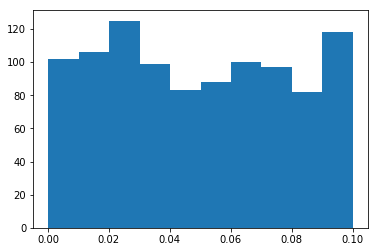

In [45]:
plt.hist(sep)
plt.show()